In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import pandas as pd # data processing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv1D,Dropout,LSTM, Bidirectional
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from keras.layers import BatchNormalization, Dropout
from keras.layers import Dense, Activation
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
import torch
from torch.nn import Transformer
from sklearn.preprocessing import StandardScaler #good
from sklearn.preprocessing import MinMaxScaler,MaxAbsScaler
from sklearn import metrics #accuracy measure
import joblib
import warnings

In [2]:
training_set=os.listdir("./training_set_df/")
df=None
for data in training_set:
    if data.endswith('.csv'):
        file=f"./training_set_df/{data}"
        if df is None:
            df=pd.read_csv(file)
        else:
            d=pd.read_csv(file)
            df=pd.concat([df,d])
# df

In [3]:
test=pd.read_csv('./test_set_df/S08T1.csv')
X_test=test.drop("label",axis=1)
y_test=test['label']

In [4]:
X_train=df.drop("label",axis=1)
y_train=df['label']

              precision    recall  f1-score   support

           0       0.87      0.62      0.72        94
           1       0.50      0.33      0.40         3
           2       0.86      0.86      0.86        21
           3       0.17      0.25      0.20         4
           4       0.39      0.60      0.47        30
           5       0.50      0.75      0.60         4
           6       0.71      1.00      0.83         5
           7       0.78      0.90      0.84        31
           8       0.62      0.71      0.67         7

    accuracy                           0.69       199
   macro avg       0.60      0.67      0.62       199
weighted avg       0.74      0.69      0.70       199



/Users/khangphan/anaconda3/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/khangphan/anaconda3/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/Users/khangphan/anaconda3/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/Users/khangphan/anaconda3/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or

<Axes: >

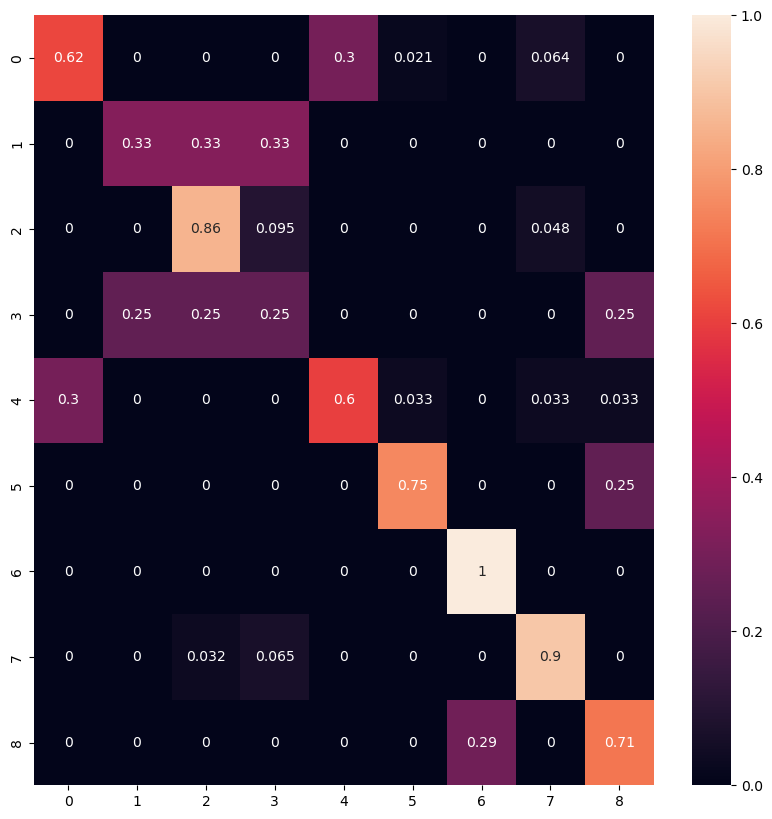

In [5]:
from xgboost import XGBClassifier#XGBcalssifier
xgbcl=XGBClassifier( eval_metric='logloss', random_state=10)
xgbcl.fit(X_train,y_train)
# filename = './xgb_model.sav'
# xgbcl=joblib.load(filename)
pred=xgbcl.predict(X_test)
from sklearn import metrics #accuracy measure
print(metrics.classification_report(pred,y_test))
ax,fig=plt.subplots(figsize=(10,10))
conf=metrics.confusion_matrix(pred,y_test, normalize='true')
sns.heatmap(conf,annot=True)

In [6]:
# from sklearn.ensemble import RandomForestClassifier #Random Forest
# rf=RandomForestClassifier(random_state=10)
# rf.fit(X_train,y_train)
# pred=rf.predict(X_test)

# print(metrics.classification_report(pred,y_test))
# ax,fig=plt.subplots(figsize=(10,10))
# conf=metrics.confusion_matrix(pred,y_test, normalize='true')
# sns.heatmap(conf,annot=True)

In [7]:
import joblib
filename = './xgb_model.sav'
joblib.dump(xgbcl, filename)

In [8]:
# from sklearn.svm import SVC
# svc=SVC()
# svc.fit(X_train,y_train)
# pred=svc.predict(X_test)

# print(metrics.classification_report(pred,y_test))
# ax,fig=plt.subplots(figsize=(10,10))
# conf=metrics.confusion_matrix(pred,y_test, normalize='true')
# sns.heatmap(conf,annot=True)

In [9]:
# from sklearn.neighbors import KNeighborsClassifier,RadiusNeighborsClassifier
# knn = RadiusNeighborsClassifier(radius=175)
# knn.fit(X_train,y_train)
# pred=knn.predict(X_test)

# print(metrics.classification_report(pred,y_test))
# ax,fig=plt.subplots(figsize=(10,10))
# conf=metrics.confusion_matrix(pred,y_test, normalize='true')
# sns.heatmap(conf,annot=True)

In [10]:
# from sklearn.linear_model import SGDClassifier
## sgd=SGDClassifier()loss='epsilon_insensitive'
# sgd.fit(X_train,y_train)
# pred=sgd.predict(X_test)

# print(metrics.classification_report(pred,y_test))
# ax,fig=plt.subplots(figsize=(10,10))
# conf=metrics.confusion_matrix(pred,y_test, normalize='true')
# sns.heatmap(conf,annot=True)

              precision    recall  f1-score   support

           0       0.76      0.74      0.75        69
           1       0.50      0.17      0.25         6
           2       0.76      0.89      0.82        18
           3       0.67      0.50      0.57         8
           4       0.72      0.65      0.68        51
           5       0.67      0.57      0.62         7
           6       0.86      1.00      0.92         6
           7       0.75      0.90      0.82        30
           8       0.50      1.00      0.67         4

    accuracy                           0.73       199
   macro avg       0.69      0.71      0.68       199
weighted avg       0.73      0.73      0.73       199



<Axes: >

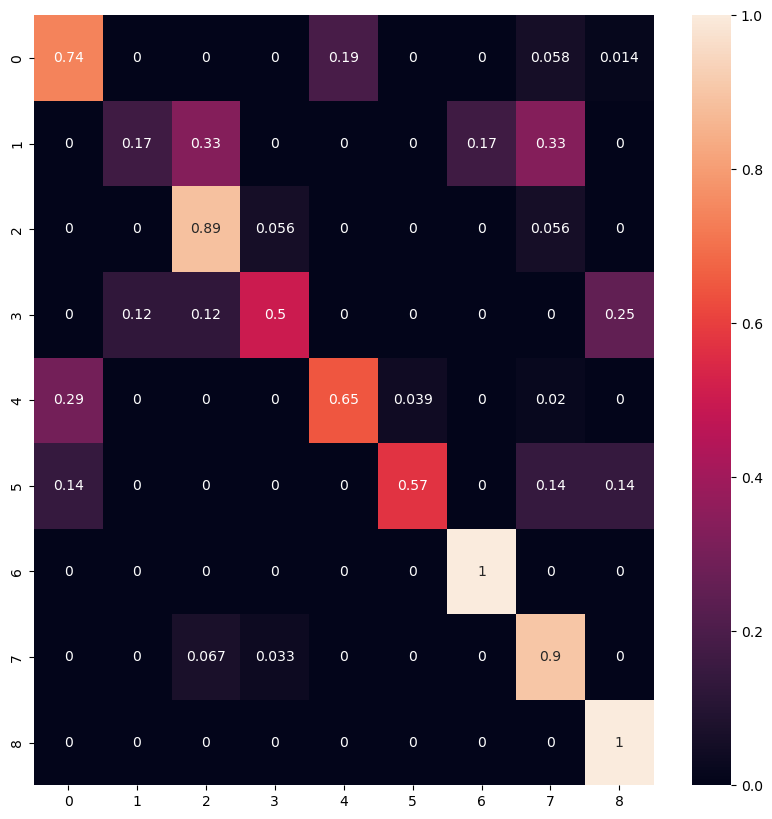

In [11]:
from imblearn.over_sampling import SMOTE,RandomOverSampler
from imblearn.over_sampling import ADASYN
from imblearn.combine import SMOTEENN
# try:
# oversampling the train dataset using SMOTE
sm = SMOTE()
all_feature_smote, all_label_smote = sm.fit_resample(X_train,y_train)
rf=RandomForestClassifier(random_state=10,n_estimators=3000,criterion='entropy')
rf.fit(all_feature_smote, all_label_smote)
# filename = './smote_rf_model.sav'
# rf=joblib.load(filename)
pred=rf.predict(X_test)

print(metrics.classification_report(pred,y_test))
ax,fig=plt.subplots(figsize=(10,10))
conf=metrics.confusion_matrix(pred,y_test, normalize='true')
sns.heatmap(conf,annot=True)



In [12]:
filename = './smote_rf_model.sav'
joblib.dump(rf, filename)

['./smote_rf_model.sav']

              precision    recall  f1-score   support

           0       0.79      0.63      0.70        84
           1       0.50      0.25      0.33         4
           2       0.86      0.90      0.88        20
           3       0.33      0.50      0.40         4
           4       0.48      0.59      0.53        37
           5       0.33      0.29      0.31         7
           6       0.86      0.75      0.80         8
           7       0.78      0.93      0.85        30
           8       0.62      1.00      0.77         5

    accuracy                           0.69       199
   macro avg       0.62      0.65      0.62       199
weighted avg       0.70      0.69      0.69       199



/Users/khangphan/anaconda3/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/khangphan/anaconda3/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/Users/khangphan/anaconda3/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/Users/khangphan/anaconda3/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or

<Axes: >

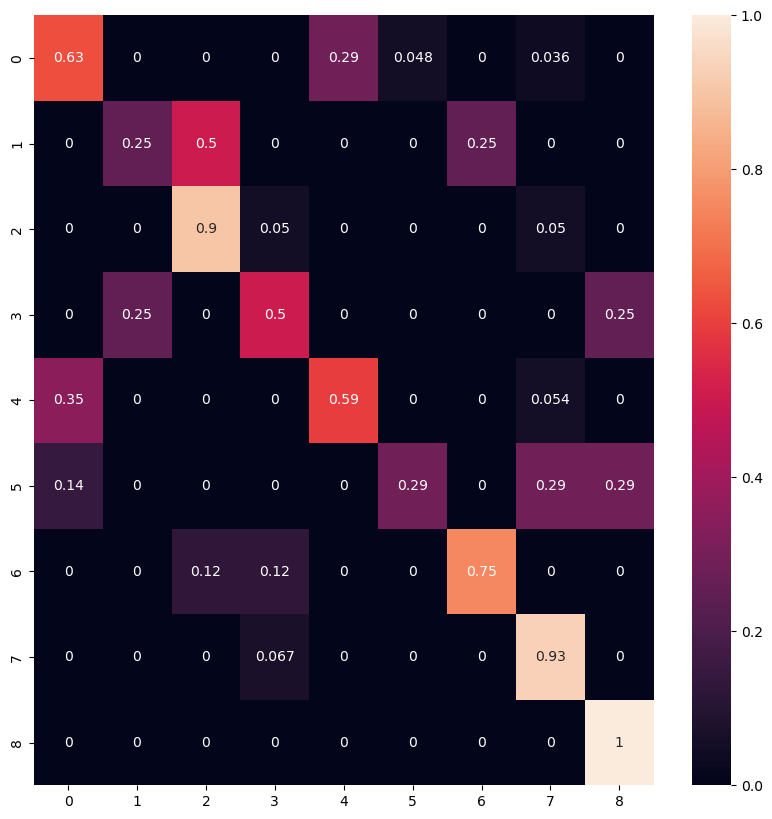

In [13]:
# xgbcl=XGBClassifier( eval_metric='logloss', random_state=10)
# xgbcl.fit(all_feature_smote, all_label_smote)
# # filename = './smote_xgb_model.sav'
# # xgbcl=joblib.load(filename)

# pred=xgbcl.predict(X_test)
# from sklearn import metrics #accuracy measure
# print(metrics.classification_report(pred,y_test))
# ax,fig=plt.subplots(figsize=(10,10))
# conf=metrics.confusion_matrix(pred,y_test, normalize='true')
# sns.heatmap(conf,annot=True)

In [14]:
filename = './smote_xgb_model.sav'
joblib.dump(xgbcl, filename)

['./smote_xgb_model.sav']

              precision    recall  f1-score   support

           0       0.82      0.60      0.69        92
           1       0.50      0.50      0.50         2
           2       0.86      0.86      0.86        21
           3       0.33      0.67      0.44         3
           4       0.41      0.56      0.47        34
           5       0.50      0.60      0.55         5
           6       0.29      1.00      0.44         2
           7       0.78      0.88      0.82        32
           8       0.75      0.75      0.75         8

    accuracy                           0.67       199
   macro avg       0.58      0.71      0.61       199
weighted avg       0.72      0.67      0.68       199



<Axes: >

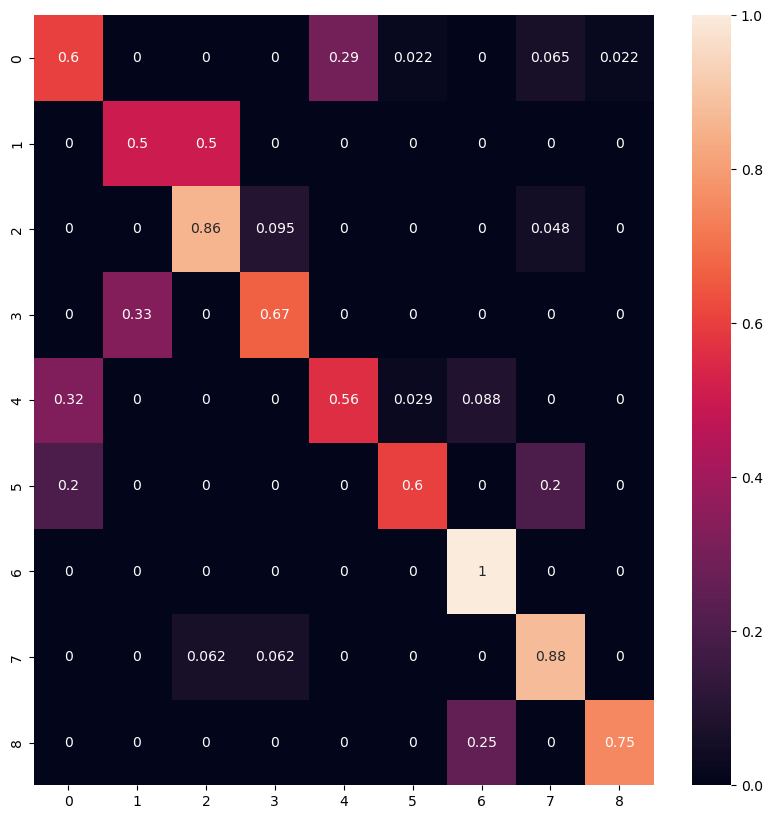

In [15]:
from sklearn.ensemble import HistGradientBoostingClassifier
HGBC=HistGradientBoostingClassifier(random_state=10)
HGBC.fit(X_train,y_train)
pred=HGBC.predict(X_test)

print(metrics.classification_report(pred,y_test))
ax,fig=plt.subplots(figsize=(10,10))
conf=metrics.confusion_matrix(pred,y_test, normalize='true')
sns.heatmap(conf,annot=True)

In [16]:
# from sklearn.ensemble import AdaBoostClassifier
# ada=AdaBoostClassifier(random_state=10)
# ada.fit(X_train,y_train)
# pred=ada.predict(X_test)

# print(metrics.classification_report(pred,y_test))
# ax,fig=plt.subplots(figsize=(10,10))
# conf=metrics.confusion_matrix(pred,y_test, normalize='true')
# sns.heatmap(conf,annot=True)

              precision    recall  f1-score   support

           0       0.90      0.61      0.73        98
           1       0.50      0.33      0.40         3
           2       0.86      0.86      0.86        21
           3       0.17      0.25      0.20         4
           4       0.33      0.60      0.42        25
           5       0.33      0.50      0.40         4
           6       0.86      1.00      0.92         6
           7       0.81      0.91      0.85        32
           8       0.62      0.83      0.71         6

    accuracy                           0.69       199
   macro avg       0.60      0.65      0.61       199
weighted avg       0.76      0.69      0.71       199



<Axes: >

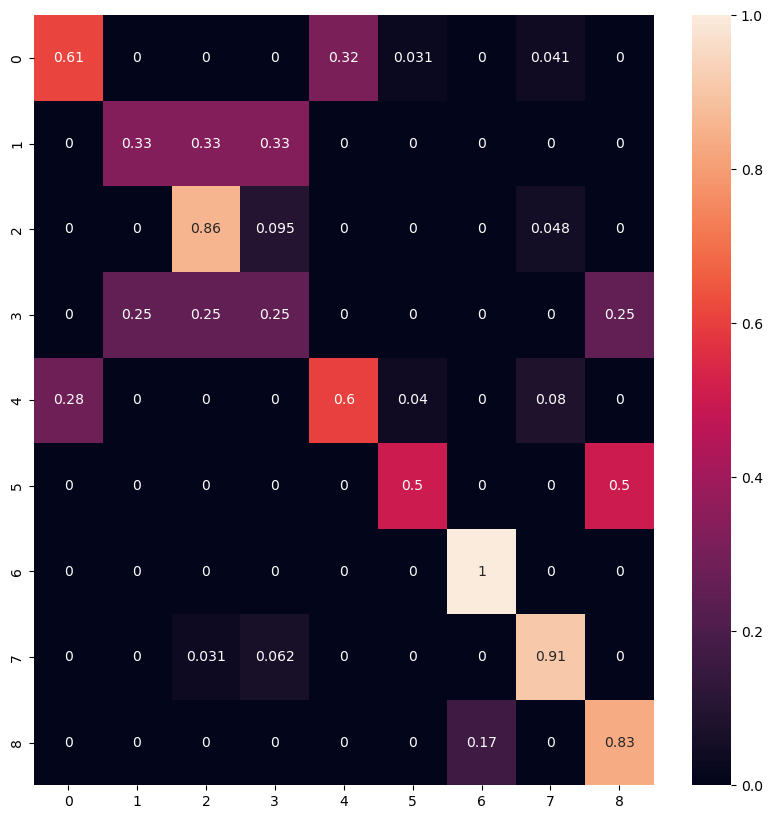

In [17]:
from catboost import CatBoostClassifier
# catboost=CatBoostClassifier()
# catboost.fit(X_train,y_train)
filename = './catboost_model.sav'
catboost=joblib.load(filename)
pred=catboost.predict(X_test)

print(metrics.classification_report(pred,y_test))
ax,fig=plt.subplots(figsize=(10,10))
conf=metrics.confusion_matrix(pred,y_test, normalize='true')
sns.heatmap(conf,annot=True)

In [18]:
# filename = './catboost_model.sav'
# joblib.dump(catboost, filename)

In [42]:
all_feature_smote.shape
all_label_smote.shape

(10566,)

In [83]:
# trainX=np.array(all_feature_smote)
# trainY=np.array(all_label_smote)
# testX=np.array(X_test)
# testY=np.array(y_test)
# early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
# from tensorflow.keras import models
# model = models.Sequential()
# model.add(layers.Conv1D(128,128, activation='relu', input_shape=(len(trainX[1]), 1)))#64
# model.add(layers.MaxPooling1D(4))
# model.add(Activation('relu'))
# model.add(LSTM(units = 32, return_sequences = True))
# # model.add(Dropout(0.3))
# model.add(layers.Conv1D(64, 64, activation='relu'))#32
# model.add(layers.MaxPooling1D(4))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))

# model.add(LSTM(units = 16, return_sequences = True))
# # model.add(layers.Dense(64, activation='relu'))
# model.add(layers.Conv1D(16, 16, activation='relu'))
# model.add(layers.MaxPooling1D(4))
# # model.add(layers.Conv1D(8, 8, activation='relu'))
# model.add(layers.Flatten())
# # model.add(Activation('relu'))

# model.add(layers.Dense(64, activation='relu'))
# model.add(layers.Dense(32, activation='relu'))
# model.add(layers.Dense(16, activation='relu'))
# model.add(layers.Dense(9,activation='softmax'))
# model.compile(optimizer='adam',
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])

# history = model.fit(trainX,trainY, epochs=100, 
#                     validation_data=(testX,testY), 
#                     callbacks=[early_stopping])

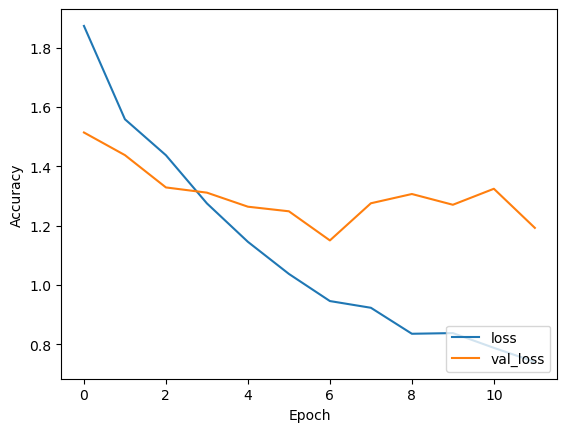

In [81]:
# plt.clf()
# plt.plot(history.history['loss'], label='loss')
# plt.plot(history.history['val_loss'], label = 'val_loss')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')

# plt.legend(loc='lower right')

7/7 [==============================] - 0s 21ms/step
              precision    recall  f1-score   support

           0       0.78      0.65      0.71        80
           1       0.50      0.25      0.33         4
           2       0.67      0.67      0.67        21
           3       0.33      0.20      0.25        10
           4       0.46      0.54      0.49        39
           5       0.50      0.75      0.60         4
           6       0.43      0.75      0.55         4
           7       0.67      0.92      0.77        26
           8       0.88      0.64      0.74        11

    accuracy                           0.64       199
   macro avg       0.58      0.60      0.57       199
weighted avg       0.65      0.64      0.64       199



<Axes: >

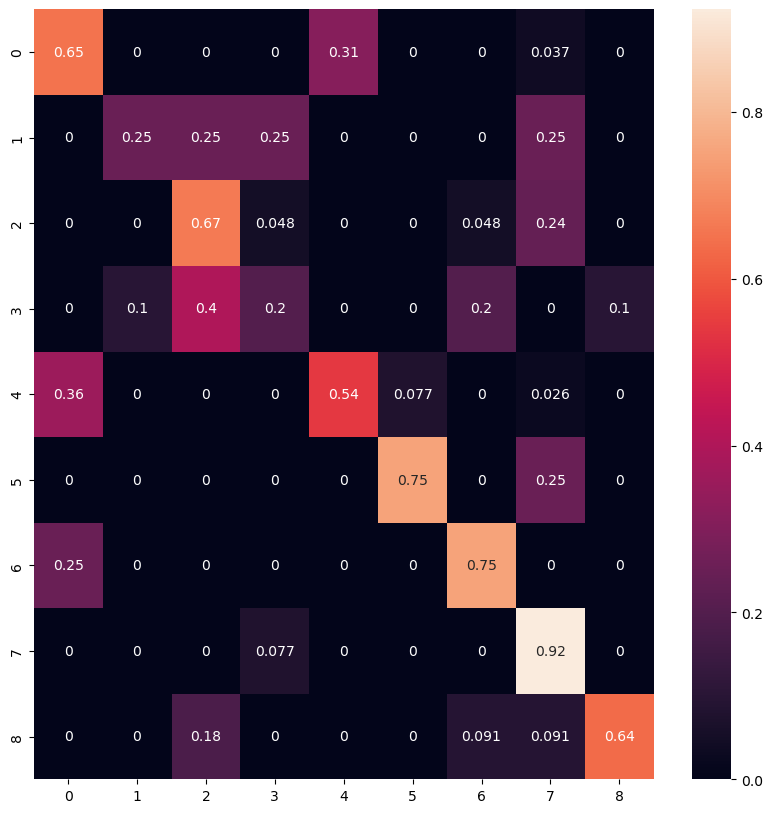

In [47]:
# pred=model.predict(testX)
# pred=np.argmax(pred,axis=1)
# print(metrics.classification_report(pred,testY))
# ax,fig=plt.subplots(figsize=(10,10))
# conf=metrics.confusion_matrix(pred,testY, normalize='true')
# sns.heatmap(conf,annot=True)

In [25]:

def output_xgb(ID,out):
    warnings.simplefilter('ignore')
    test=pd.read_csv(f'./test_set_df/{ID}')
    X_test=test.drop("label",axis=1)
    y_test=test['label']
    filename = './smote_xgb_model.sav'
    xgbcl=joblib.load(filename)
    # xgbcl=joblib.load(filename)
    pred=xgbcl.predict(X_test)
    acc= metrics.accuracy_score(pred,y_test)
    f1s=metrics.f1_score(pred,y_test,average='weighted')
    return out.append([ID[:5],acc,f1s])

In [31]:
test_set=os.listdir('./test_set_df')
out_xgb=[]
for ID in test_set:
    output_xgb(ID,out_xgb)
out_df_xgb=pd.DataFrame(out_xgb,columns=['ID','accuracy','weighted avg F1-score'])
out_df_xgb

,ID,accuracy,weighted avg F1-score
0,S08T1,0.688442,0.688091
1,S08T2,0.695652,0.701434
2,N11T1,0.730159,0.734184
3,N11T2,0.758065,0.786853
4,N06T1,0.548913,0.531116
5,S02T2,0.654545,0.653075
6,N06T2,0.700000,0.708604
7,S02T1,0.666667,0.691523
8,N02T2,0.500000,0.496808
9,N02T1,0.672414,0.673119


In [32]:
def output_rf(ID,out):
    test=pd.read_csv(f'./test_set_df/{ID}')
    X_test=test.drop("label",axis=1)
    y_test=test['label']
    filename = './smote_rf_model.sav'
    xgbcl=joblib.load(filename)
    # xgbcl=joblib.load(filename)
    pred=xgbcl.predict(X_test)
    acc= metrics.accuracy_score(pred,y_test)
    f1s=metrics.f1_score(pred,y_test,average='weighted')
    return out.append([ID[:5],acc,f1s])

In [33]:
test_set=os.listdir('./test_set_df')
out_rf=[]
for ID in test_set:
    output_rf(ID,out_rf)
out_df=pd.DataFrame(out_rf,columns=['ID','accuracy','weighted avg F1-score'])
out_df.describe()

,accuracy,weighted avg F1-score
count,12.000000,12.000000
mean,0.642038,0.662737
std,0.095313,0.090945
min,0.445652,0.456775
25%,0.608296,0.656656
50%,0.651258,0.679551
75%,0.733417,0.728316
max,0.746032,0.758465


In [34]:
out_df.describe()

,accuracy,weighted avg F1-score
count,12.000000,12.000000
mean,0.642038,0.662737
std,0.095313,0.090945
min,0.445652,0.456775
25%,0.608296,0.656656
50%,0.651258,0.679551
75%,0.733417,0.728316
max,0.746032,0.758465


In [35]:
out_df_xgb.describe()

,accuracy,weighted avg F1-score
count,12.000000,12.000000
mean,0.657879,0.668640
std,0.072132,0.080651
min,0.500000,0.496808
25%,0.643156,0.658113
50%,0.669540,0.689807
75%,0.696739,0.703226
max,0.758065,0.786853
